In [2]:
# INDICATEUR DU MOIS DE FEVRIER

In [3]:
## Import data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Set Visualization Styles
sns.set_style("whitegrid")
sns.set_context("talk")

In [5]:
import pandas as pd
triage_frame = pd.read_csv('dataset/Triage.csv')

In [6]:
# iterating the columns 
for col in triage_frame.columns: 
    print(col) 

Date
Code
postnom
prenom
<5
nom
Contact patient
Quartier
Avenue
phone
Age
Sexe
Urgence
NC/AC
Plaintes
Service d'orientation
Type de visite
Mode de paiement
Référence
Type d'urgence


In [7]:
triage_ = triage_frame[['Date','Age','Sexe','NC/AC', "Service d'orientation",'Référence']]
print(triage_)

                 Date  Age Sexe        NC/AC Service d'orientation Référence
0       2/1/2020 1:55    1    M  Nouveau cas             Pédiatrie       non
1       2/1/2020 7:59   50    F  Nouveau cas      Médecine interne       oui
2       2/1/2020 8:01   39    F  Nouveau cas      Médecine interne       oui
3       2/1/2020 8:08    9    M  Nouveau cas                   ORL       oui
4       2/1/2020 8:12    1    F  Nouveau cas                   ORL       oui
...               ...  ...  ...          ...                   ...       ...
2233  2/29/2020 20:04   31    M  Nouveau cas      Médecine interne       oui
2234  2/29/2020 20:56   48    M  Nouveau cas             Chirurgie       non
2235  2/29/2020 21:39   75    M  Nouveau cas      Médecine interne       oui
2236  2/29/2020 21:50   27    M  Nouveau cas      Médecine interne       non
2237  2/29/2020 23:10   19    M  Nouveau cas             Chirurgie       non

[2238 rows x 6 columns]


In [9]:
#triage_frame_cleaned.isnull().sum()

In [10]:
# Touver tous les NC/AC vide et completer a Nouveau cas
triage_frame_cleaned = triage_.fillna(value={'NC/AC': 'Nouveau cas'})
print(triage_frame_cleaned.head(10))

            Date  Age Sexe        NC/AC Service d'orientation Référence
0  2/1/2020 1:55    1    M  Nouveau cas             Pédiatrie       non
1  2/1/2020 7:59   50    F  Nouveau cas      Médecine interne       oui
2  2/1/2020 8:01   39    F  Nouveau cas      Médecine interne       oui
3  2/1/2020 8:08    9    M  Nouveau cas                   ORL       oui
4  2/1/2020 8:12    1    F  Nouveau cas                   ORL       oui
5  2/1/2020 8:16   22    F  Nouveau cas           Dentisterie       oui
6  2/1/2020 8:17   86    M  Nouveau cas             Chirurgie       oui
7  2/1/2020 8:22   25    F  Nouveau cas      Médecine interne       oui
8  2/1/2020 8:28    2    F  Nouveau cas             Pédiatrie       oui
9  2/1/2020 8:31   68    M   Ancien cas      Médecine interne       oui


In [11]:
# Remplacer "Neonat" par "Ped" 
triage_frame_cleaned["Service d'orientation"]= triage_frame_cleaned["Service d'orientation"].str.replace("Néonatologie", 
                                                                       "Pédiatrie", 
                                                                       case = False) 
print(triage_frame_cleaned.head(10))

            Date  Age Sexe        NC/AC Service d'orientation Référence
0  2/1/2020 1:55    1    M  Nouveau cas             Pédiatrie       non
1  2/1/2020 7:59   50    F  Nouveau cas      Médecine interne       oui
2  2/1/2020 8:01   39    F  Nouveau cas      Médecine interne       oui
3  2/1/2020 8:08    9    M  Nouveau cas                   ORL       oui
4  2/1/2020 8:12    1    F  Nouveau cas                   ORL       oui
5  2/1/2020 8:16   22    F  Nouveau cas           Dentisterie       oui
6  2/1/2020 8:17   86    M  Nouveau cas             Chirurgie       oui
7  2/1/2020 8:22   25    F  Nouveau cas      Médecine interne       oui
8  2/1/2020 8:28    2    F  Nouveau cas             Pédiatrie       oui
9  2/1/2020 8:31   68    M   Ancien cas      Médecine interne       oui


In [12]:
#triage_frame_cleaned["Service d'orientation"].value_counts().plot(kind='barh',figsize=(10, 6));


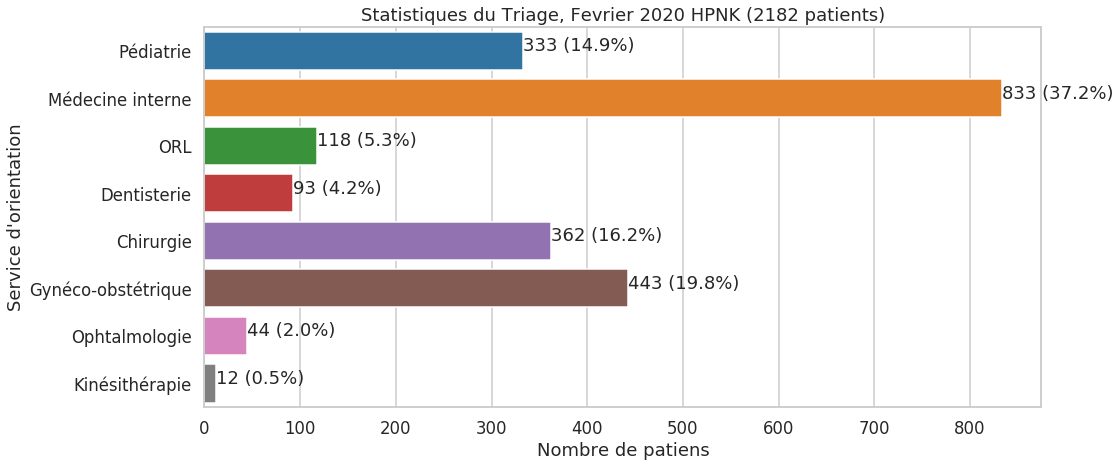

In [13]:
plt.figure(figsize=(15,7))
ax = sns.countplot(y="Service d'orientation", data=triage_frame_cleaned)
plt.title('Statistiques du Triage, Fevrier 2020 HPNK (2182 patients)')
plt.xlabel('Nombre de patiens')
#plt.xticks(rotation =0,fontsize =25)
#plt.yticks(rotation =0,fontsize =25)
total = len(triage_frame_cleaned["Service d'orientation"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(str(x)+" ("+str(percentage)+")", (x, y))
plt.show()

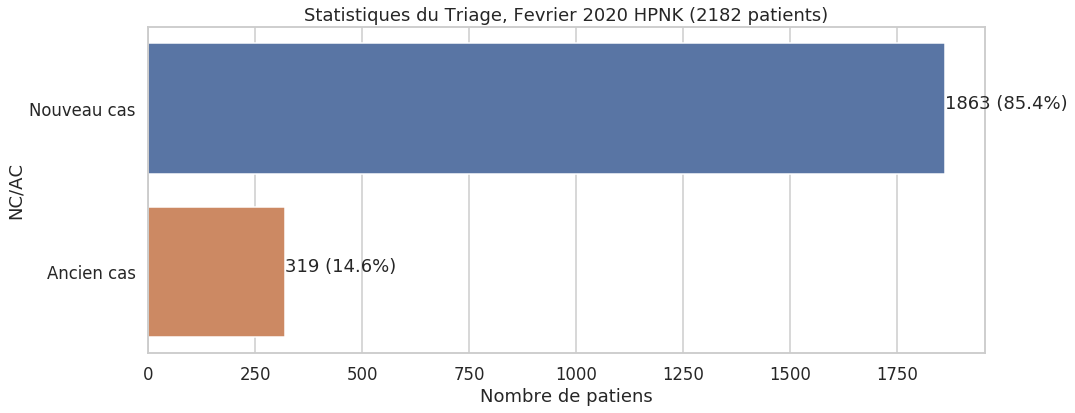

In [406]:
plt.figure(figsize=(15,6))
ax = sns.countplot(y="NC/AC", data=triage_frame_cleaned)
plt.title('Statistiques du Triage, Fevrier 2020 HPNK (2182 patients)')
plt.xlabel('Nombre de patiens')
total = len(triage_frame_cleaned["NC/AC"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(str(x)+" ("+str(percentage)+")", (x, y))

plt.show()

In [367]:
triage_frame_cleaned.isnull().sum()

Date                     0
Age                      0
Sexe                     0
NC/AC                    0
Service d'orientation    0
Référence                0
dtype: int64

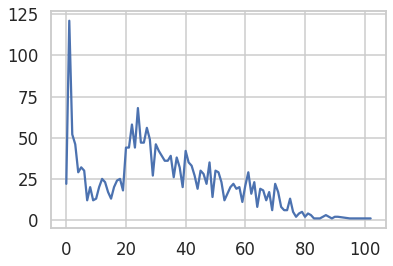

In [368]:
triage_frame_cleaned['Age'].value_counts().sort_index().plot.line()


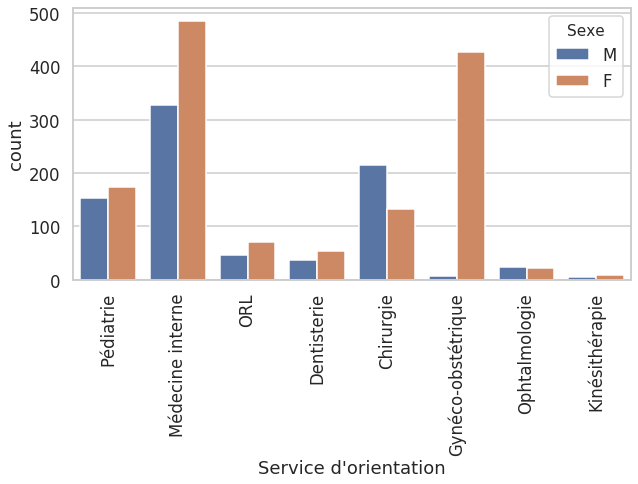

In [408]:
plt.figure(figsize=[10,5])
sns.countplot(hue = 'Sexe', x = "Service d'orientation", data = triage_frame_cleaned)
plt.xticks(rotation = 90);


In [384]:
# Convert datetime to date
triage_frame_cleaned['Date'] = pd.to_datetime(triage_frame_cleaned['Date'], errors='coerce')
#triage_frame_cleaned['Date'] = triage_frame_cleaned['Date'].dt.date

print(triage_frame_cleaned.head(10))

                 Date  Age Sexe        NC/AC Service d'orientation Référence
0 2020-02-01 01:55:00    1    M  Nouveau cas             Pédiatrie       non
1 2020-02-01 07:59:00   50    F  Nouveau cas      Médecine interne       oui
2 2020-02-01 08:01:00   39    F  Nouveau cas      Médecine interne       oui
3 2020-02-01 08:08:00    9    M  Nouveau cas                   ORL       oui
4 2020-02-01 08:12:00    1    F  Nouveau cas                   ORL       oui
5 2020-02-01 08:16:00   22    F  Nouveau cas           Dentisterie       oui
6 2020-02-01 08:17:00   86    M  Nouveau cas             Chirurgie       oui
7 2020-02-01 08:22:00   25    F  Nouveau cas      Médecine interne       oui
8 2020-02-01 08:28:00    2    F  Nouveau cas             Pédiatrie       oui
9 2020-02-01 08:31:00   68    M   Ancien cas      Médecine interne       oui


In [385]:
# plt.figure(figsize=(10,5))
# sns.distplot(triage_frame_cleaned['Age'], bins=29, color='g');

NameError: name 'date' is not defined

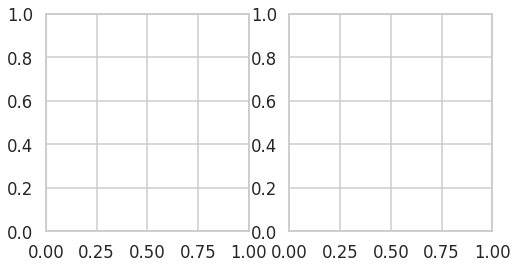

In [392]:

# first we'll do it the default way, with gaps on weekends
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes[0]
ax.plot(date, r.adj_close, 'o-')
ax.set_title("Default")
fig.autofmt_xdate()

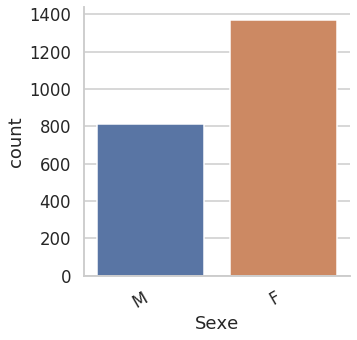

In [387]:
ax = sns.catplot(x='Sexe',kind='count',data=triage_frame_cleaned,orient="h")
ax.fig.autofmt_xdate()